In [1]:
import tensorflow as tf
import collections
import matplotlib.pyplot as plt

In [2]:
dataset=tf.keras.datasets.mnist.load_data()

In [3]:
train,test=dataset

In [4]:
(X_train,y_train),(X_test,y_test)=dataset

In [5]:
collections.Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [6]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=['sparse_categorical_crossentropy'],metrics=['accuracy'],)

In [10]:
r=model.fit(X_train,y_train,validation_split=0.2,batch_size=50,epochs=50)

Epoch 1/50
960/960 [==============================] - 1s 1ms/step - loss: 3.4150 - accuracy: 0.7233 - val_loss: 0.5772 - val_accuracy: 0.8558
Epoch 2/50
960/960 [==============================] - 1s 966us/step - loss: 0.6556 - accuracy: 0.8254 - val_loss: 0.4027 - val_accuracy: 0.8990
Epoch 3/50
960/960 [==============================] - 1s 907us/step - loss: 0.5042 - accuracy: 0.8652 - val_loss: 0.3617 - val_accuracy: 0.9148
Epoch 4/50
960/960 [==============================] - 1s 930us/step - loss: 0.4262 - accuracy: 0.8857 - val_loss: 0.3076 - val_accuracy: 0.9293
Epoch 5/50
960/960 [==============================] - 1s 887us/step - loss: 0.3991 - accuracy: 0.8939 - val_loss: 0.3040 - val_accuracy: 0.9348
Epoch 6/50
960/960 [==============================] - 1s 915us/step - loss: 0.3627 - accuracy: 0.9061 - val_loss: 0.2682 - val_accuracy: 0.9352
Epoch 7/50
960/960 [==============================] - 1s 1ms/step - loss: 0.3393 - accuracy: 0.9083 - val_loss: 0.2595 - val_accuracy: 0.9

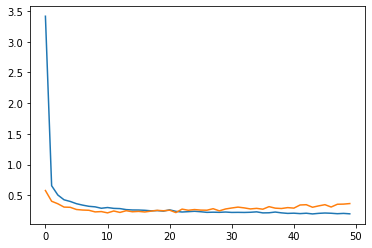

In [11]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

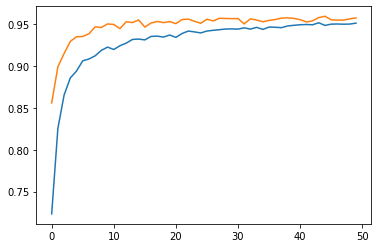

In [12]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])